In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import linecache

from astropy.io import fits

0.04197595 0.17233 0.0350472
-0.0372089 1.2312531999999994
-0.0186623 0.07995692199999997


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4414/3947829372.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fname, sep="\s+", skipinitialspace=True, skiprows=7, names=columns)


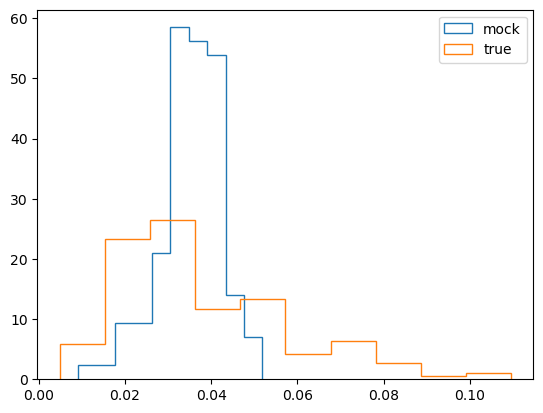

In [30]:
fname = '/data101/bartlett/fsigma8/PV_data/Foundation_DR1/Foundation_DR1.FITRES.TEXT'

# Get header
columns = ['SN'] + linecache.getline(fname, 6).strip().split()[1:]
df = pd.read_csv(fname, sep="\s+", skipinitialspace=True, skiprows=7, names=columns)

zCMB = df['zCMB']
m = df['mB']
m_err = df['mBERR']

x1 = df['x1']
hyper_stretch_mu = np.median(x1)
hyper_stretch_sigma = (np.percentile(x1, 84) - np.percentile(x1, 16)) / 2

c = df['c']
hyper_c_mu = np.median(c)
hyper_c_sigma = (np.percentile(c, 84) - np.percentile(c, 16)) / 2

sigma_m = np.median(df['mBERR'])
sigma_stretch = np.median(df['x1ERR'])
sigma_c = np.median(df['cERR'])
print(sigma_m, sigma_stretch, sigma_c)

print(hyper_stretch_mu, hyper_stretch_sigma)
print(hyper_c_mu, hyper_c_sigma)
    
plt.figure()
speed_of_light = 299792  # km/s
mock_z = np.load('sn_z.npy')
mock_z /= speed_of_light
plt.hist(mock_z, bins=10, label='mock', histtype='step', density=True)
plt.hist(zCMB, bins=10, label='true', histtype='step', density=True)
plt.legend()

In [23]:
# Open the FITS file
fname = '/data101/bartlett/fsigma8/PV_data/Foundation_DR1/kcor_PS1_none.fits'
with fits.open(fname) as hdul:
    hdul.info()  # Show summary of FITS file contents

Filename: /data101/bartlett/fsigma8/PV_data/Foundation_DR1/kcor_PS1_none.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (0,)      
  1  ZPoff         1 BinTableHDU     19   11R x 5C   [20A, 20A, 1E, 1E, 1E]   
  2  SN SED        1 BinTableHDU     19   97626R x 1C   [1E]   
  3  KCOR          1 BinTableHDU     15   0R x 3C   [1E, 1E, 1E]   
  4  MAG+MWXTCOR    1 BinTableHDU     59   0R x 25C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  5  FilterTrans    1 BinTableHDU     33   921R x 12C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  6  PrimarySED    1 BinTableHDU     15   921R x 3C   [1E, 1E, 1E]   
